In [8]:
# This file is meant to verify the correctness of the implementation of the
# standardization of the data

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

#matplotlib widget
# Load the data
base_dir = '/datasets/AddBiomechanics/processed_data/'

# Started to process
dataset = 'Falisse2017'
dataset = 'Wang2023'
dataset = 'vanderZee2022'
dataset = 'Tan2022'
dataset = 'Fregly2012'
dataset = 'Camargo2021'
dataset = 'Moore2015'
dataset = 'Hamner2013'
dataset = 'Han2023'
# Not started
dataset = 'Santos2017'
dataset = 'Tan2022'
dataset = 'Tan2021'
#dataset = 'Han2023'
dataset = 'Tiziana2019'
dataset = 'Carter2023'


dataset = 'Han2023'
file_version = 'phase'
file_name = f'{base_dir}{dataset}_{file_version}.parquet'

data = pd.read_parquet(file_name)
data.columns

Index(['subject', 'subject_mass', 'task', 'frame_number', 'time', 'comPos_x_c',
       'comPos_y_c', 'comPos_z_c', 'comVel_x_c', 'comVel_y_c', 'comVel_z_c',
       'contact_r', 'contact_l', 'mtpPos_x_r', 'mtpPos_y_r', 'mtpPos_z_r',
       'mtpPos_x_l', 'mtpPos_y_l', 'mtpPos_z_l', 'grf_x_r', 'grf_y_r',
       'grf_z_r', 'grf_x_l', 'grf_y_l', 'grf_z_l', 'cop_x_r', 'cop_y_r',
       'cop_z_r', 'cop_x_l', 'cop_y_l', 'cop_z_l', 'pelvis_angle_s',
       'pelvis_angle_f', 'pelvis_angle_t', 'hip_angle_s_r', 'hip_angle_f_r',
       'hip_angle_t_r', 'knee_angle_s_r', 'ankle_angle_s_r', 'ankle_angle_t_r',
       'hip_angle_s_l', 'hip_angle_f_l', 'hip_angle_t_l', 'knee_angle_s_l',
       'ankle_angle_s_l', 'ankle_angle_t_l', 'dorsi_angle_r', 'dorsi_angle_l',
       'shank_angle_r', 'shank_angle_l', 'thigh_angle_r', 'thigh_angle_l',
       'shank_vel_r', 'shank_vel_l', 'thigh_vel_r', 'thigh_vel_l',
       'ankle_vel_r', 'ankle_vel_l', 'pelvis_vel_s', 'pelvis_vel_f',
       'pelvis_vel_t', 'hip_vel_

In [9]:
data['subject'].unique()

array(['s002', 's001', 's004', 's006', 's005', 's007'], dtype=object)

In [11]:
# Display all the tasks for 'subject5'
data['task'].unique()
# Filter for 'Gait_10' tasks



array(['20220520_treearms_3', '20220520_walk_1', '20220520_walk_2',
       '20220520_walk_3', '20220520_worrier1_4', '20220520_worrier2_1',
       '20220520_tree_4', '20220513_worrier2_1', '20220513_worrier2_2',
       '20220513_worrier2_3', '20220513_sidestretch_2', '20220513_tree_2',
       '20220513_treearms_2', '20220513_treearms_4',
       '20220513_jumpingjack_4', '20220513_soccerkick_1',
       '20220513_soccerkick_1_full', '20220513_soccerkick_4_full',
       '20220513_soccerkick_5_full', '20220513_walk_1', '20220513_walk_2',
       '20220513_walk_3', '20220513_worrier1_2', '20220513_worrier1_4',
       '20220513_tennisserve_2', '20220513_tennisserve_3',
       '20220524_worrier2_3', '20220524_walk_2', '20220524_worrier1_1',
       '20220524_worrier1_2', '20220524_worrier1_4', '20220524_tree_3',
       '20220524_walk_5', '20220524_soccerkick_3', '20220614_worrier2_4',
       '20220614_tennisserve_1', '20220614_walk_3', '20220614_hopping_1',
       '20220614_jumpingjack_3', '202

In [12]:
import os
import fastparquet as fp
import pyarrow.parquet as pq
def convert_Santos2017(data):
    # TODO: Varun
    pass

def convert_Tan2022(data):
    # TODO: Varun
    pass

def convert_Tan2023(data):
    # TODO: Jiayi
    pass

def convert_Han2023(data):
  
    # Extract the date (first part) and the task name (second part)
    data['task_info'] = data['task']  # Save the original task info to 'task_info'
    
    # Remove the leading date from the task
    data['task'] = data['task'].apply(lambda x: '_'.join(x.split('_')[1:]))

    data['walking_speed'] = 0.0  # Initialize with float zero
    
    
    data['walking_speed_valid'] = 0  # Initialize with integer zero
    

def convert_Tiziana2019(data):
    # TODO: Varun
    pass

def convert_Carter2023(file_name='Carter2023_time.parquet',base_dir = '/datasets/AddBiomechanics/raw_data/', output_dir='/datasets/AddBiomechanics/processed_data/'):
    # Function to process each chunk (row group)
    # Define paths
    parquet_file = os.path.join(output_dir, file_name)
    csv_file = os.path.join(base_dir, "Carter_participants_info.csv")

    # Load Participant_Info CSV using pandas
    Participant_Info = pd.read_csv(csv_file)
    def process_chunk(chunk, participant_info):
        # Clean 'subject' and 'task' columns
        chunk['subject'] = chunk['subject'].str.replace(r'(_.*)$', '', regex=True)
        chunk['task'] = chunk['task'].str.replace(r'_..$', '', regex=True)

        # Split 'task' column into three parts
        chunk[['task_part1', 'task_part2', 'task_part3']] = chunk['task'].str.split('_', expand=True, n=2)

        # Create 'incline' column
        chunk['incline'] = 0.01  # Default to 0.01
        chunk.loc[chunk['task_part1'].str.contains('uphill', case=False), 'incline'] = 0.06
        chunk.loc[chunk['task_part1'].str.contains('downhill', case=False), 'incline'] = -0.04

        # Create 'activity_type' column
        chunk['activity_type'] = 'other'
        chunk.loc[chunk['task_part1'].str.contains('walk', case=False), 'activity_type'] = 'walk'
        chunk.loc[chunk['task_part1'].str.contains('run', case=False), 'activity_type'] = 'run'

        # Merge with Participant_Info using pandas
        chunk = chunk.merge(participant_info[['Participant_code', 'Norm_Speed (km/h)']],
                            left_on='subject', right_on='Participant_code', how='left')

        # Apply the velocity logic
        conditions = [
            (chunk['activity_type'] == 'walk') & (chunk['task_part2'].str.contains('slow', case=False)),
            (chunk['activity_type'] == 'walk') & (chunk['task_part2'].str.contains('fast', case=False)),
            (chunk['activity_type'] == 'run') & (chunk['task_part2'].str.contains('fixed', case=False)),
            (chunk['activity_type'] == 'run') & (chunk['task_part2'].str.contains('slow', case=False)),
            (chunk['activity_type'] == 'run') & (chunk['task_part2'].str.contains('fast', case=False)),
            (chunk['activity_type'] == 'run') & (chunk['task_part2'].str.contains('norm', case=False)),
        ]

        choices = [
            3,  # slow walk
            5,  # fast walk
            12,  # fixed running speed
            chunk['Norm_Speed (km/h)'] * 0.9,  # slow run
            chunk['Norm_Speed (km/h)'] * 1.1,  # fast run
            chunk['Norm_Speed (km/h)'],  # normal run
        ]

        chunk['walking_speed'] = np.select(conditions, choices, default=None)

        # Create 'trial' column
        chunk['trial'] = chunk['task_part3']
        
        # Drop the original split columns
        chunk.drop(columns=['task_part1', 'task_part2', 'task_part3'], inplace=True)
        
        ########################
        # Below follows the standard 
        chunk['task_info']=chunk['task']
        chunk['task']=chunk['activity_type']
        return chunk



    def process_in_row_group_chunks(parquet_file, participant_info, output_file):

        pf = pq.ParquetFile(parquet_file)

        first_chunk=True
        
        # Iterate over row groups
        for batch in tqdm(pf.iter_batches()):
            
            chunk=batch.to_pandas()

            # Process the current chunk
            processed_chunk = process_chunk(chunk, participant_info)

            # Save the processed chunk to Parquet (append mode for subsequent chunks)
            processed_chunk.to_parquet(output_file, index=False,  engine='fastparquet', append=not first_chunk)

            # Ensure first_chunk is False after the first write
            first_chunk = False


    # Call the function to process in row group chunks
    output_file = os.path.join(output_dir, 'Carter_added.parquet')
    process_in_row_group_chunks(parquet_file, Participant_Info, output_file)

    print("Processing and saving completed.")


def convert_Hamner2013(df):
    # This dataset only contains running
    df['task_info'] = df['task']
    df['task'] = 'run'

    # Running speed is dependent on the integer value of the task
    # Tasks are 'run200', 'run300', 'run400', and 'run500'	
    df['walking_speed'] = None
    for i in range(2,6):
        df.loc[df['task_info'].str.contains(str(i)), 'walking_speed'] = float(i)
    # Verify that all the walking speeds have been set
    assert df['walking_speed'].isnull().sum() == 0, \
        'Not all walking speeds have been set for the Hamner2013 dataset'
    
    # Set the ground inclination to be zero 
    df['ground_inclination'] = 0


def convert_Moore2015(df):
    # Add a column called task_info with additional information 
    # about the task
    df['task_info'] = df['task']

    # There's only level-ground walking in this dataset
    df['task'] = 'level_walking'

    # Add a list of the walking speeds
    # https://peerj.com/articles/918/ 
    # Table 1
    walking_speed_task_speed_list = [
        # [Task number, Speed (m/s)]
        # 0.8 m/s
        [[9,12,15,16,19,25,32,40,46,49,55,61,67,73,76],0.8],
        # 1.2 m/s
        [[10,13,17,20,26,31,41,47,50,56,62,68,74,77],1.2],
        # 1.6 m/s
        [[11,14,18,21,27,33,42,48,51,57,63,69,75,78],1.6],
    ]
    # Add a column called walking_speed
    df['walking_speed'] = None
    # Set the walking speed for each task
    for task_list,speed in walking_speed_task_speed_list:
        for task in task_list:
            # First, convert the task number to a string
            task_str = str(task)
            # Then, set the walking speed for the task
            df.loc[df['task_info'].str.contains(task_str), 
                   'walking_speed'] = speed

    # Verify that all the walking speeds have been set
    assert df['walking_speed'].isnull().sum() == 0, \
        'Not all walking speeds have been set for the Moore2015 dataset'



def convert_Camargo2021(df):
    # TODO:Varun
    # Add a column called task_info with additional information 
    # about the task.
    df['task_info'] = df['task']

    # Create a list of the original tasks and the new task name
    # to be used for the conversion
    task_conversion_list = [
        # [Original task, New task]
        ['treadmill', 'level_walking'],
        ['Treadmill', 'level_walking'],
        ['levelground', 'level_walking'],
        ['LevelGround', 'level_walking'],

        ['ramp', 'ramp'],
        ['Ramp', 'ramp'],

        ['stairs', 'stairs'],
        ['Stairs', 'stairs'],
    ]
    # Convert the tasks to the same format as in the other datasets
    for old_task,new_task in task_conversion_list:
        df.loc[df['task'].str.contains(old_task), 'task'] = new_task


def convert_Fregly2012(df):
    # TODO:Varun
    # Keep th original task column as task_info 
    df['task_info'] = df['task']
    # Set the subject name as the first two characters of the task
    df['subject'] = df['task'].str[:2]
    # Remove the first three characters of the task name
    df['task_info'] = df['task_info'].apply(lambda x: x[3:])

    # Create a list of the original tasks and the new task name
    # to be used for the conversion
    task_conversion_list = [
        # [Original task, New task]
        ['ngait', 'level_walking'],              # Normal Gait
        
        ['mtpgait', 'modified_walking'],    # Medial Trus
        ['medthrust', 'modified_walking'],  # Medial Thrust
        ['mtgait', 'modified_walking'],     # Medial Thrust Gait

        ['wpgait', 'modified_walking'],     # Walking Pole
        ['tsgait', 'modified_walking'],     # Trunk Sway Gait
        
        ['mildcrouch', 'modified_walking'], # Mild Crouch Gait
        ['crouch_og', 'modified_walking'],  # Crouch Gait
        
        ['bouncy', 'modified_walking'],     # Bouncy Gait
        ['smooth', 'modified_walking'],     # Smooth Gait?
        ['rightturn', 'modified_walking'],  # Right Turn
    ]
    # Convert the tasks to the same format as in the other datasets
    for old_task,new_task in task_conversion_list:
        df.loc[df['task'].str.contains(old_task), 'task'] = new_task

def convert_Tan2022(df):
    # TODO: Jiayi
    # Add a column called task_info with additional information 
    # about the task
    df['task_info'] = None
    
    # This dataset only has running
    df['task'] = 'run'

def convert_vanderZee2022(df):
    # TODO: Jiayi
    # https://www.nature.com/articles/s41597-022-01817-1/tables/3
    # Has all the information for the speed, step length, step frequency, 
    # step width, and walking condition

    # Add a column called task_info with additional information 
    # about the task
    df['task_info'] = df['task']
    # Split the information from trial{number} to {number} (i.e. remove 
    # the word trial)
    df['task_info'] = df['task_info'].str.replace('trial', '')

    # Create a list of the original tasks and the new task name
    # to be used for the conversion
    task_conversion_list = [
        # [Original task, New task]
        ['trial', 'level_walking'],
    ]
    # Convert the tasks to the same format as in the other datasets
    for old_task,new_task in task_conversion_list:
        df.loc[df['task'].str.contains(old_task), 'task'] = new_task


def convert_Wang2023(df):
    # TODO: Jose
    # Add a column called task_info with additional information 
    # about the task
    df['task_info'] = df['task']
    
    # Create a list of the original tasks and the new task name 
    # to be used for the conversion
    task_conversion_list = [
        # [Original task, New task]
        ['walk',         'level_walking'],
        ['run',          'run'],
        ['static_pose',  'non_cyclic'],
        ['jump',         'non_cyclic'],
        ['lunge',        'non_cyclic'],
        ['squat',        'non_cyclic'],
        ['land',         'non_cyclic'],
    ]
    # Convert the tasks to the same format as in the other datasets
    for old_task,new_task in task_conversion_list:
        df.loc[df['task'].str.contains(old_task), 'task'] = new_task

    # Add ground inclination
    df['ground_inclination'] = 0


def convert_Falisse2017(df):
    # TODO: Jose
    # Add a column called task_info with additional information 
    # about the task
    df['task_info'] = df['task']
    # Split the information in task info from {task}_{number} to {number}
    df['task_info'] = df['task_info'].str.split('_').str[1]

    # Create a list of the original tasks and the new task name
    # to be used for the conversion
    task_conversion_list = [
        # [Original task, New task]
        ['Gait', 'level_walking'],
        ['StairUp', 'up_stair'],
        ['StairDown', 'down_stair'],
        ['STS', 'sit-to-stand-to-sit'],
    ]
    # Convert the tasks to the same format as in the other datasets
    for old_task,new_task in task_conversion_list:
        df.loc[df['task'].str.contains(old_task), 'task'] = new_task



#convert_Fregly2012(data)
#data['subject'].unique()

convert_Han2023(data)
print(data['subject'].unique())
print(data['task'].unique())
print(data['walking_speed'].unique())
print(data['task_info'].unique())
#convert_Carter2023()

['s002' 's001' 's004' 's006' 's005' 's007']
['treearms_3' 'walk_1' 'walk_2' 'walk_3' 'worrier1_4' 'worrier2_1'
 'tree_4' 'worrier2_2' 'worrier2_3' 'sidestretch_2' 'tree_2' 'treearms_2'
 'treearms_4' 'jumpingjack_4' 'soccerkick_1' 'soccerkick_1_full'
 'soccerkick_4_full' 'soccerkick_5_full' 'worrier1_2' 'tennisserve_2'
 'tennisserve_3' 'worrier1_1' 'tree_3' 'walk_5' 'soccerkick_3'
 'worrier2_4' 'tennisserve_1' 'hopping_1' 'jumpingjack_3' 'lambadadance_1'
 'soccerkick_2' 'idling_2' 'idling_3' 'idling_4' 'sidestretch_5' 'walk_4'
 'soccerkick_4' 'taichi_1' 'step_2' 'idling_1' 'taichi_2' 'taichi_3'
 'worrier1_3' 'treearms_1' 'tennisgroundstroke_2']


KeyError: 'walking_speed'

In [22]:
def plot_features(data, features, axis):
    for leg in ['r', 'l']:
        leg_df = data[data['phase_leading_leg'] == leg]
        x = np.linspace(0, 1, 150)
        fig, ax = plt.subplots(len(axis), len(features), squeeze=False, 
                            # Figsize depending on the number of features
                            figsize=(len(features)*5, len(axis)*5))

        for feat_i, feature in enumerate(features):
            for ax_i, axi in enumerate(axis):
                data_name = feature + '_' + axi + '_' + leg
                # Average out the data
                d = leg_df[data_name].values.reshape(-1,150)
                d_avg = np.mean(d,axis=0)
                d_std = np.std(d,axis=0)
                ax[ax_i, feat_i].plot(x,d_avg, label=data_name)
                ax[ax_i, feat_i].fill_between(x, d_avg - d_std, d_avg + d_std, alpha=0.3)
                ax[ax_i, feat_i].set_title(data_name)
        plt.suptitle("Leg " + leg)
        plt.tight_layout()

In [53]:
def plot_com(data,  axis):
    features=['comPos','comVel']
    for leg in ['r']:
        leg_df = data[data['phase_leading_leg'] == leg]
        x = np.linspace(0, 1, 150)
        fig, ax = plt.subplots(len(axis), len(features), squeeze=False, 
                            # Figsize depending on the number of features
                            figsize=(len(features)*5, len(axis)*5))

        for feat_i, feature in enumerate(features):
            for ax_i, axi in enumerate(axis):
                data_name = feature + '_' + axi + '_' + 'c'
                # Average out the data
                d = leg_df[data_name].values.reshape(-1,150)
                d_avg = np.mean(d,axis=0)
                d_std = np.std(d,axis=0)
                ax[ax_i, feat_i].plot(x,d_avg, label=data_name)
                ax[ax_i, feat_i].fill_between(x, d_avg - d_std, d_avg + d_std, alpha=0.3)
                ax[ax_i, feat_i].set_title(data_name)
        plt.suptitle("Leg " + leg)
        plt.tight_layout()

In [63]:
filtered_df = data[(data['task_info'] == 'T048') ]

filtered_df['walking_speed'].unique()

array([1.6], dtype=object)

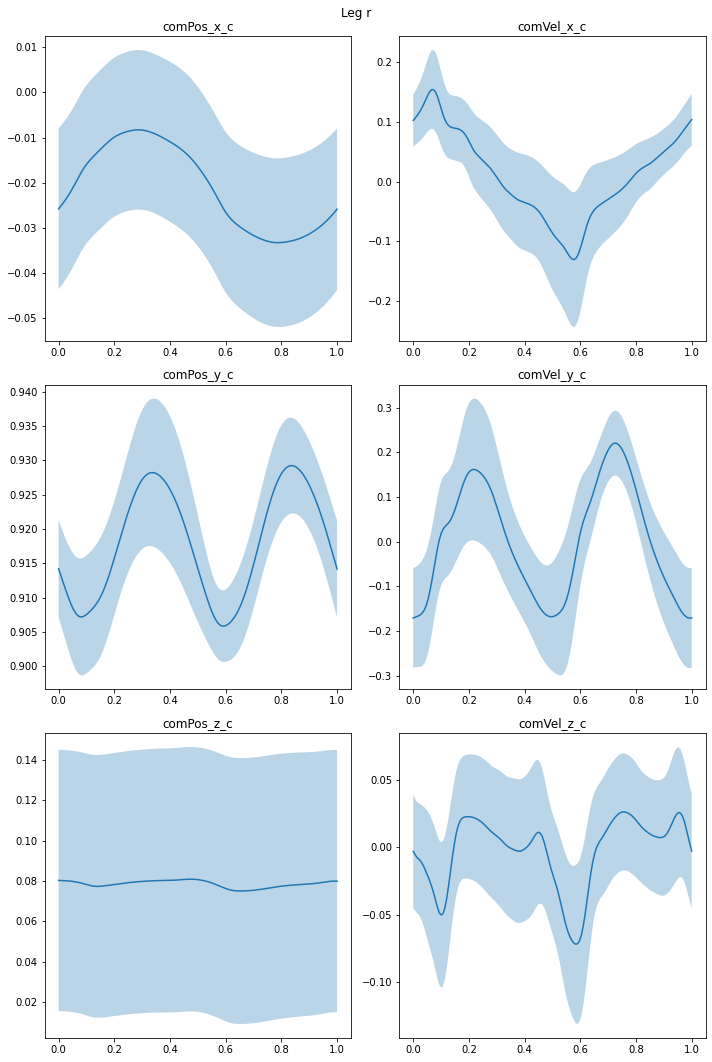

In [54]:
plot_com(filtered_df,axis)

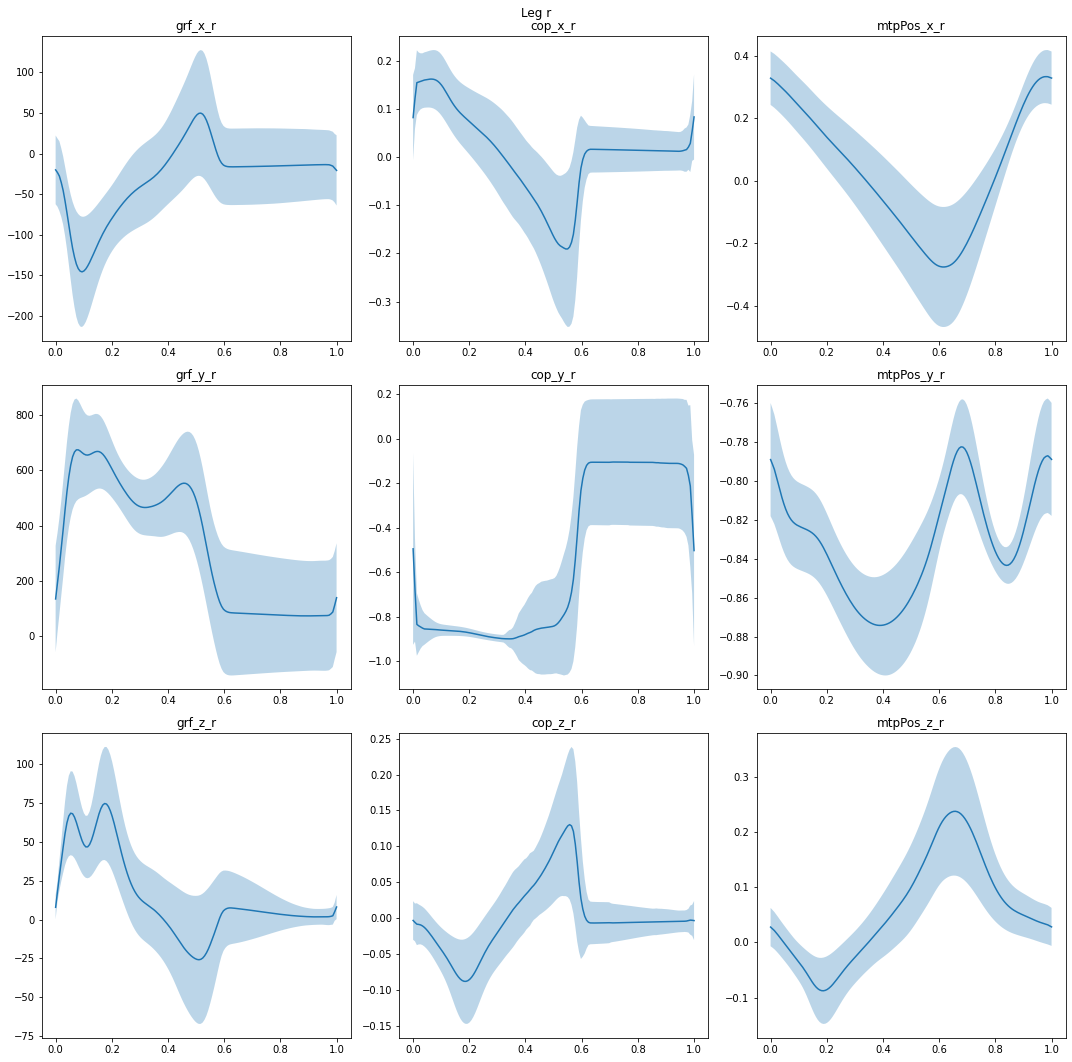

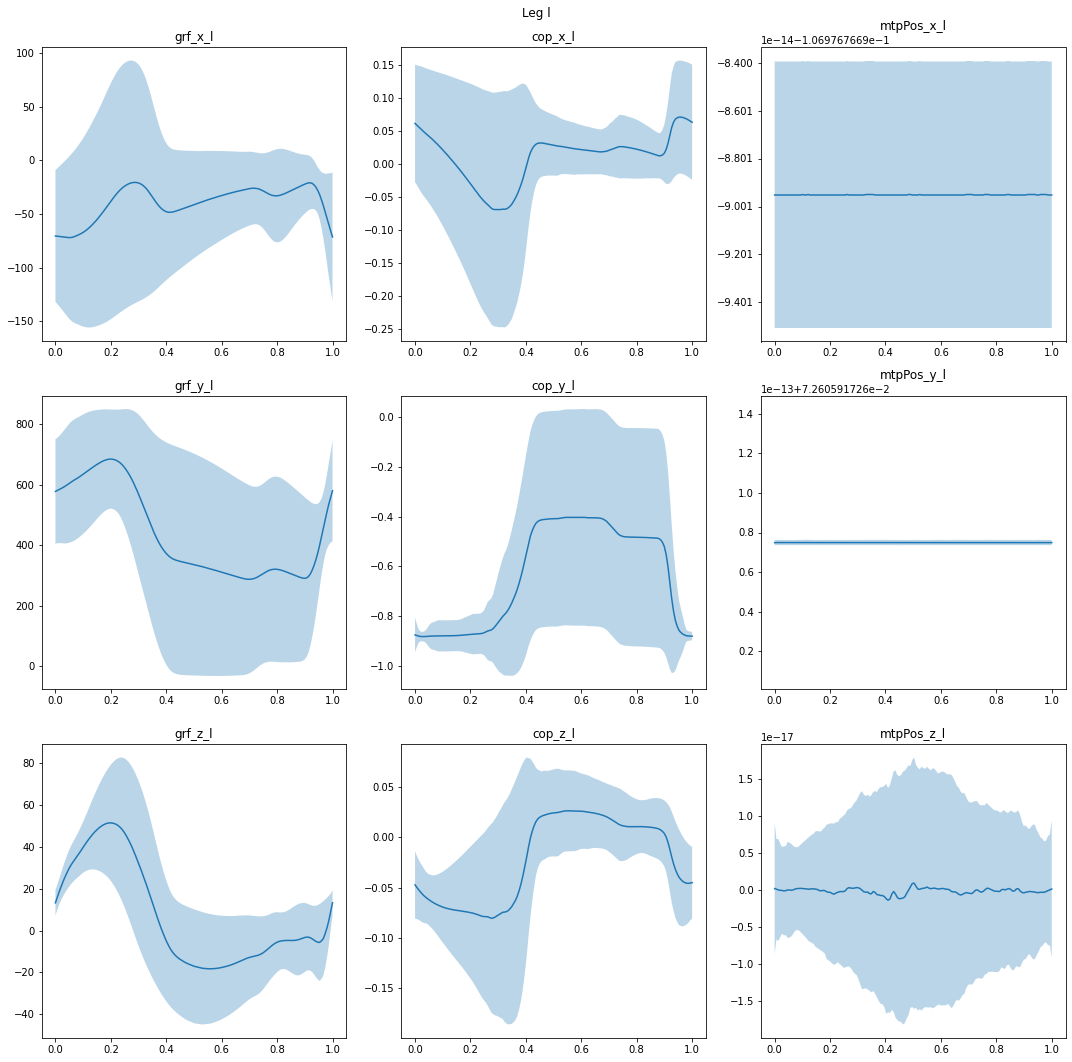

In [64]:
features = ['grf', 'cop','mtpPos']
axis = ['x', 'y', 'z']
plot_features(filtered_df, features, axis)

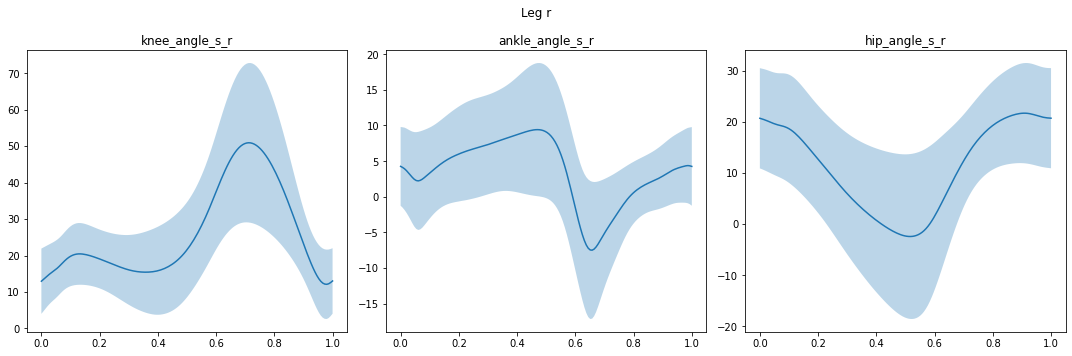

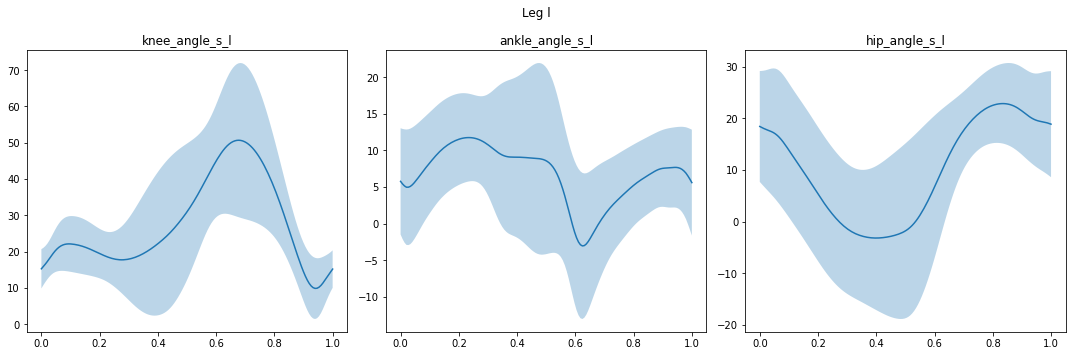

In [25]:
features = ['knee_angle', 'ankle_angle', 'hip_angle']
axis = ['s']
plot_features(data, features, axis)


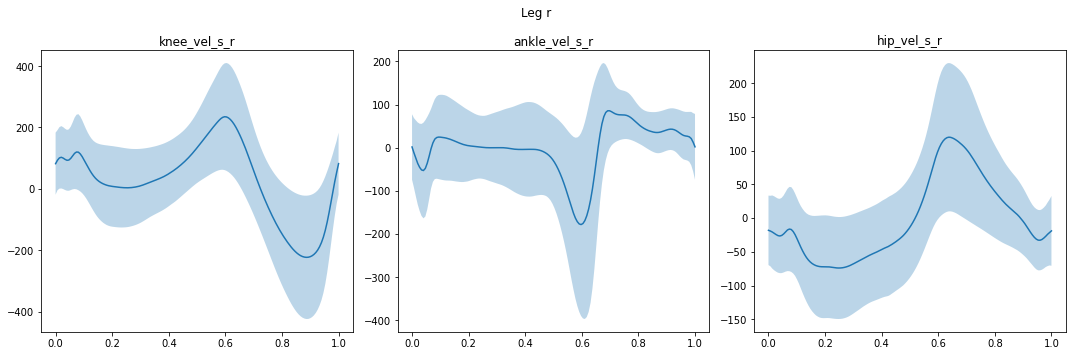

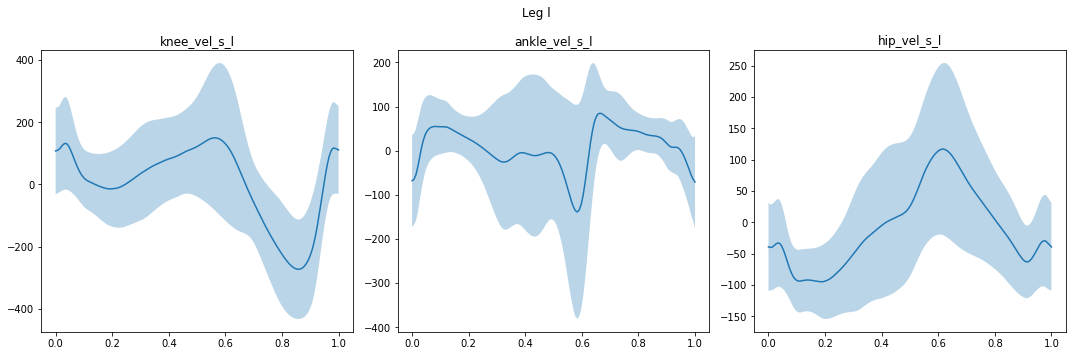

In [26]:
features = ['knee_vel', 'ankle_vel', 'hip_vel']
axis = ['s']
plot_features(data, features, axis)